In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

best_emp 74
Vaikutus työllisyyteen keskiarvo 2086215 htv, mediaani 2086972 htv std 6345 htv
   keskiarvo 2255942 työllistä, mediaani 2255722 työllistä, std 6324 työllistä


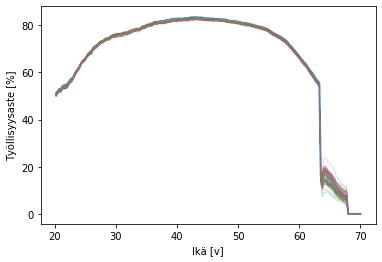

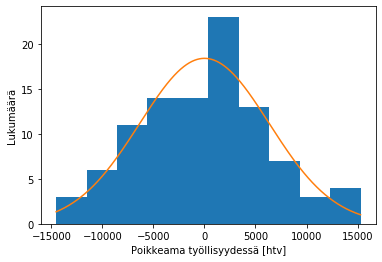

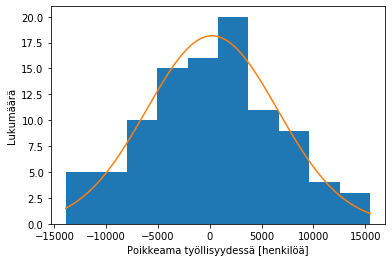

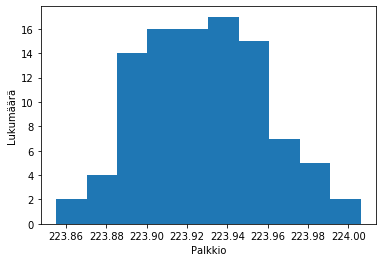

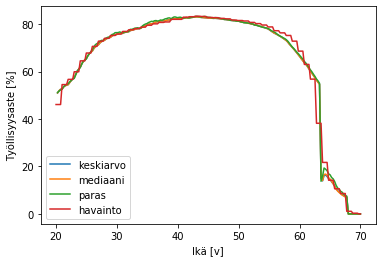

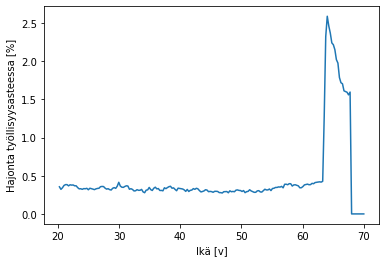

In [19]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/baseline/distrib_base_v',n=98,stats_results='results/baseline/distrib_stats')


# Putken poisto

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

best_emp 15
Vaikutus työllisyyteen keskiarvo 2090495 htv, mediaani 2090316 htv std 6319 htv
   keskiarvo 2260202 työllistä, mediaani 2259844 työllistä, std 6275 työllistä


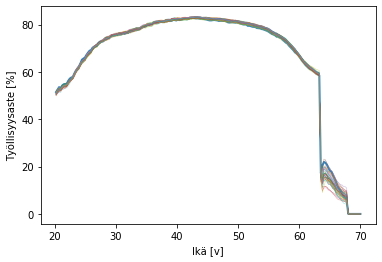

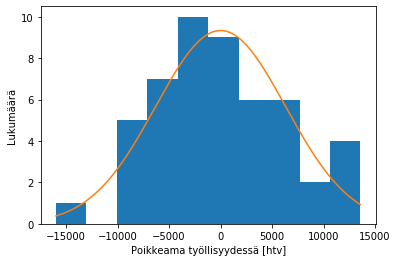

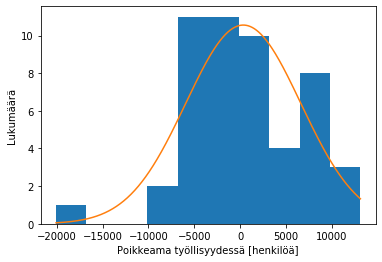

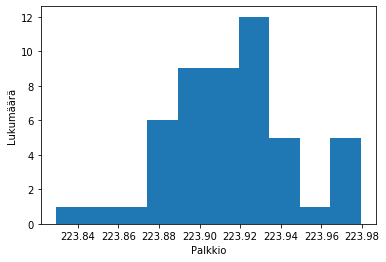

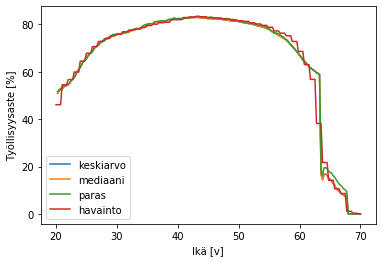

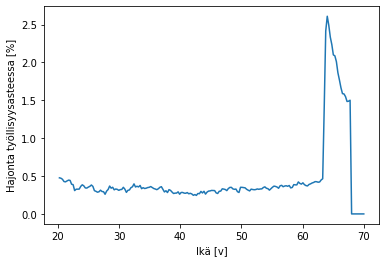

Vaikutus työllisyysasteeseen 3304.5 htv


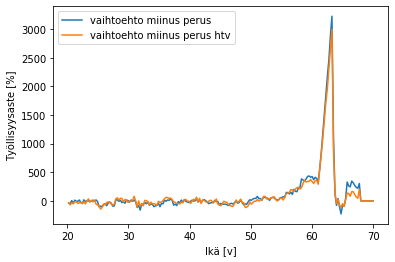

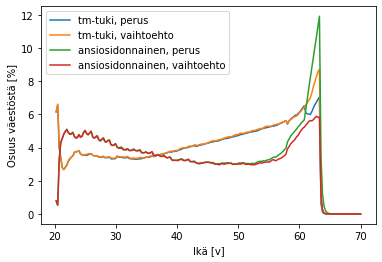

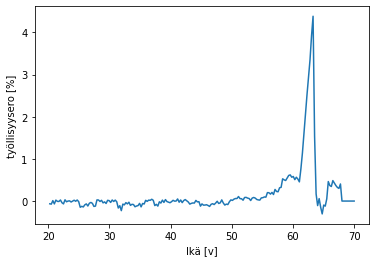

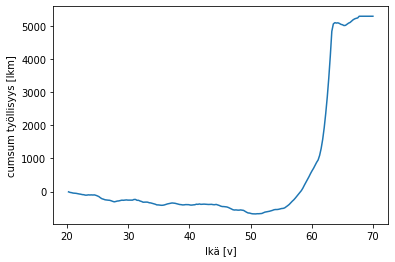

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -663.1 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 5055.9 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 4084.6 htv


In [15]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=50,startn=0,stats_results='results/putki/distrib_poisto_stats')
cc2.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')


In [5]:
#cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1b.render(load='results/distrib_base_v_100')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus työllisyysasteeseen 3304.5 htv


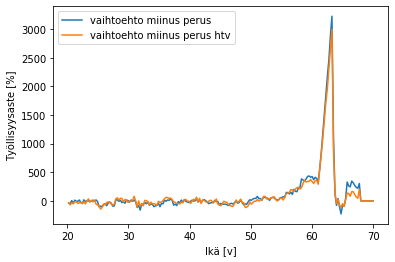

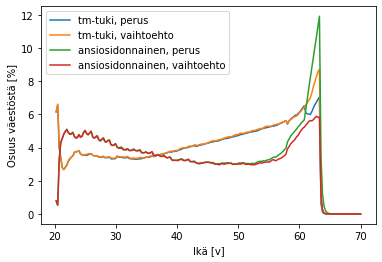

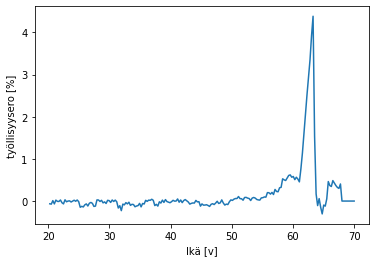

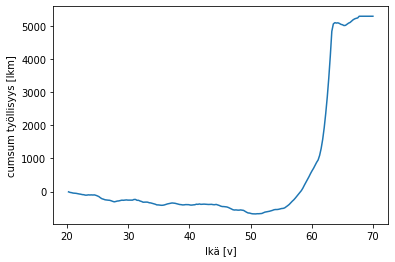

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -663.1 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 5055.9 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 4084.6 htv


In [16]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')                    



# Porrastus

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 3
Vaikutus työllisyyteen keskiarvo 2110787 htv, mediaani 2111326 htv std 6819 htv
   keskiarvo 2283726 työllistä, mediaani 2283065 työllistä, std 6629 työllistä


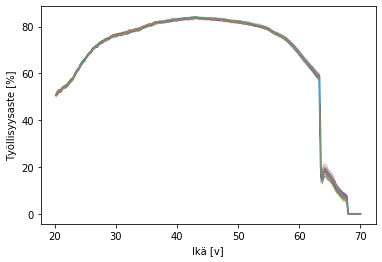

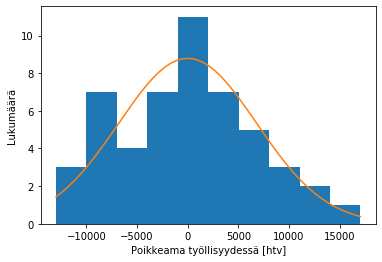

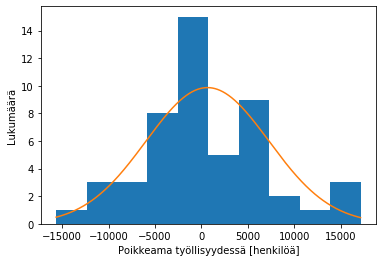

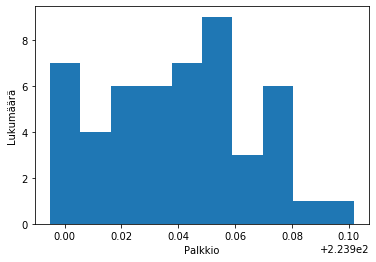

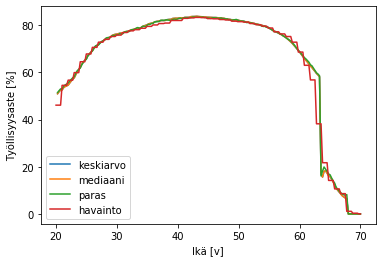

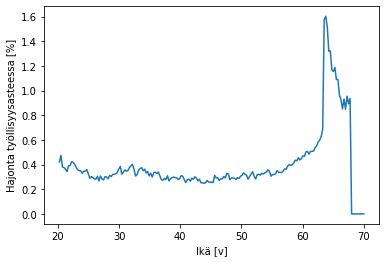

Vaikutus työllisyysasteeseen 24314.5 htv


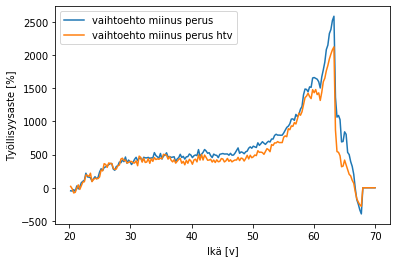

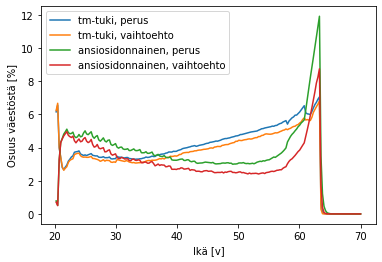

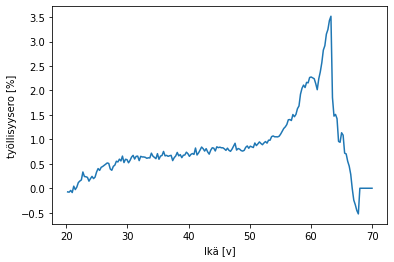

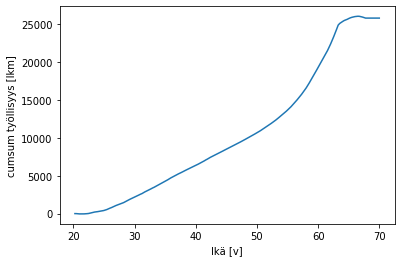

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 10728.3 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 25128.1 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 24378.8 htv


In [17]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_porras_b.render_distrib(load='results/porrastus/distrib_porras_v',n=50,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc1_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus/distrib_porras_stats')                    

# 12 kk TOE

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 5
Vaikutus työllisyyteen keskiarvo 2082495 htv, mediaani 2082658 htv std 7814 htv
   keskiarvo 2255411 työllistä, mediaani 2255338 työllistä, std 8372 työllistä


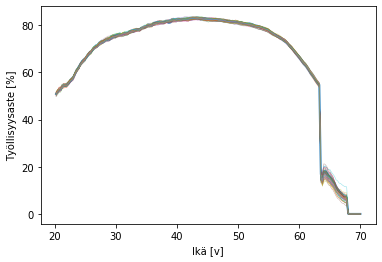

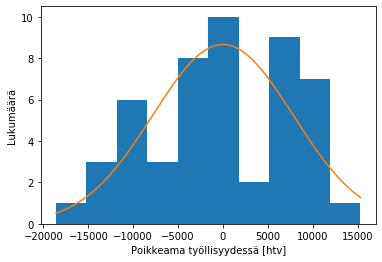

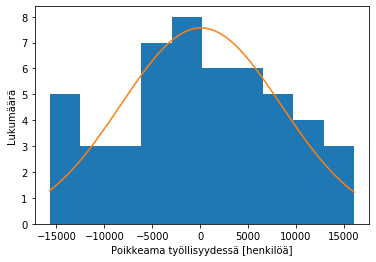

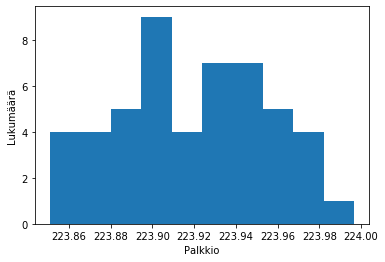

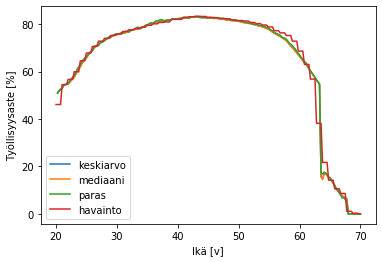

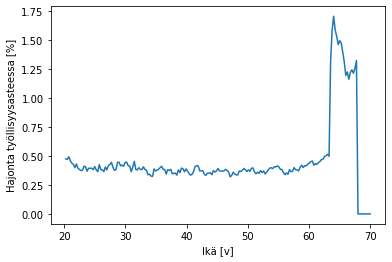

Vaikutus työllisyysasteeseen -4354.0 htv


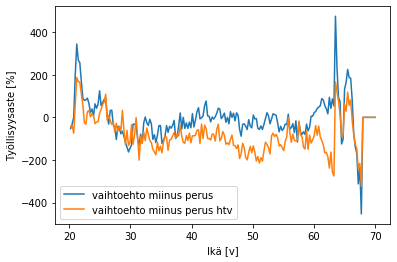

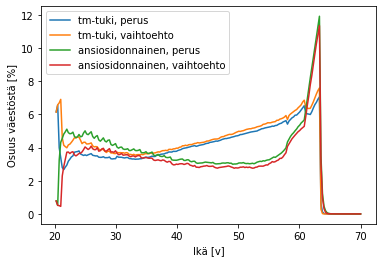

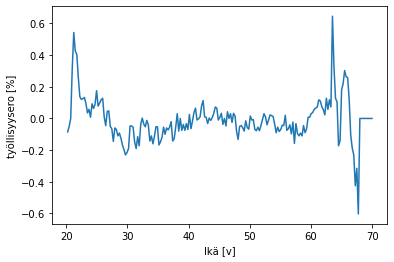

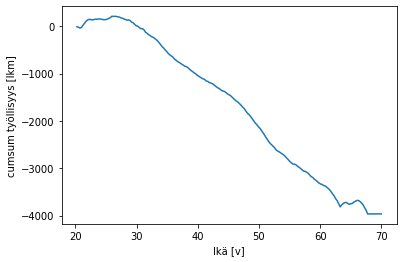

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -2147.0 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -3776.0 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -3748.9 htv


In [18]:
cc1_toe12=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_toe12.render_distrib(load='results/toe12/distrib_toe12_v',n=50,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.compare_distrib('results/baseline/distrib_stats','results/toe12/distrib_toe12_stats')                    

# 50 pv lyhennys

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 4
Vaikutus työllisyyteen keskiarvo 2086772 htv, mediaani 2087118 htv std 8261 htv
   keskiarvo 2259300 työllistä, mediaani 2258828 työllistä, std 8144 työllistä


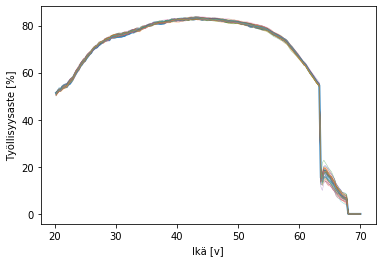

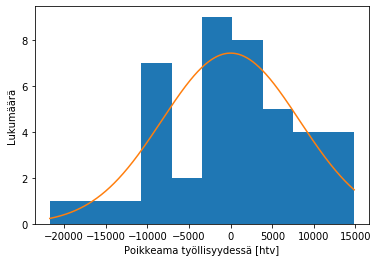

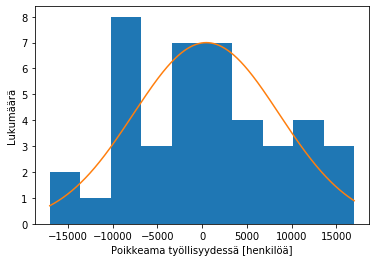

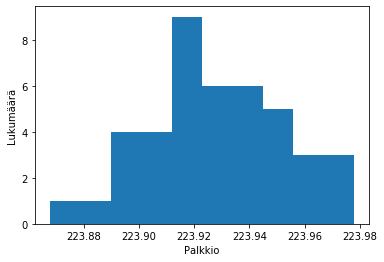

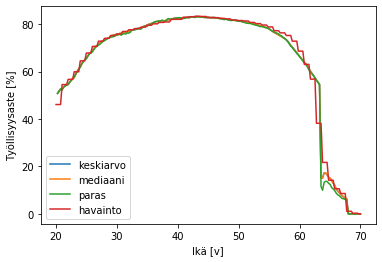

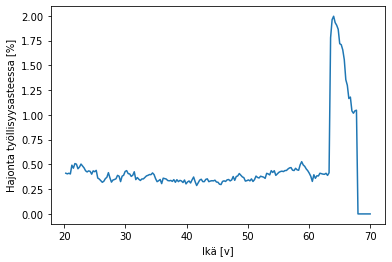

Vaikutus työllisyysasteeseen 2.5 htv


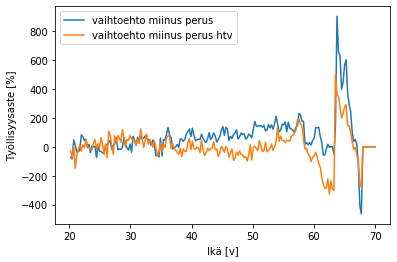

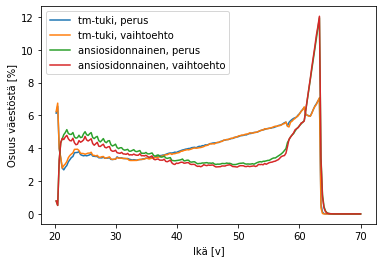

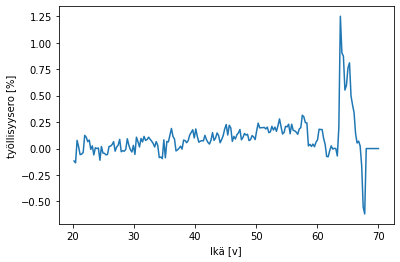

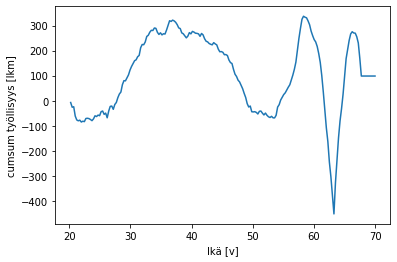

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -44.9 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -327.4 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -377.3 htv


In [9]:
cc1_50_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_50_b.render_distrib(load='results/350/distrib_350_v',n=42,startn=0,stats_results='results/350/distrib_350_stats')
cc1_50_b.compare_distrib('results/baseline/distrib_stats','results/350/distrib_350_stats')                    

# Porrastus ilman vaikutusta putkeen

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 3
Vaikutus työllisyyteen keskiarvo 2104702 htv, mediaani 2101874 htv std 9042 htv
   keskiarvo 2277434 työllistä, mediaani 2280791 työllistä, std 8739 työllistä


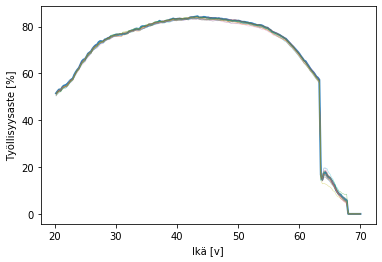

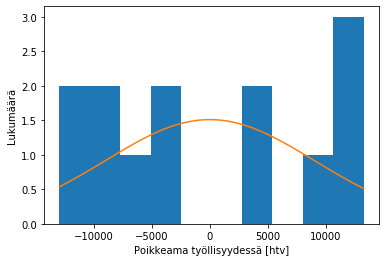

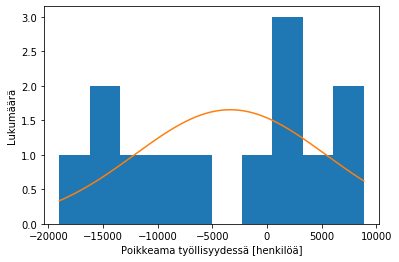

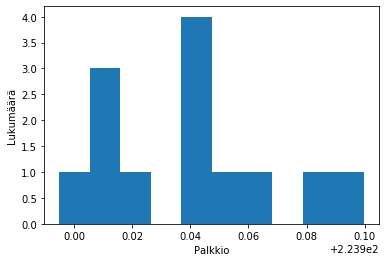

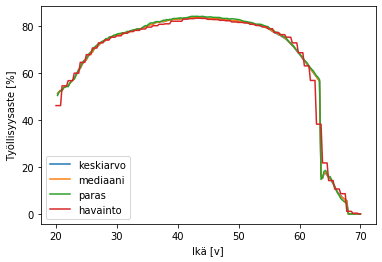

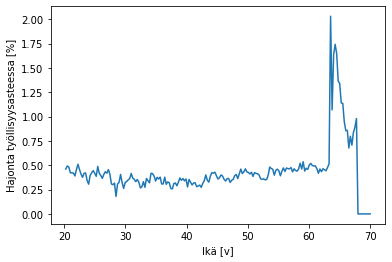

Vaikutus työllisyysasteeseen 14759.0 htv


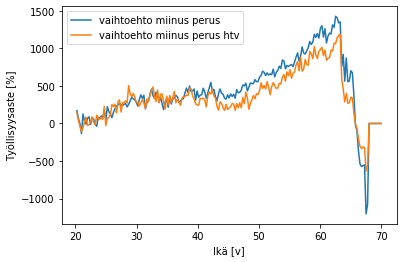

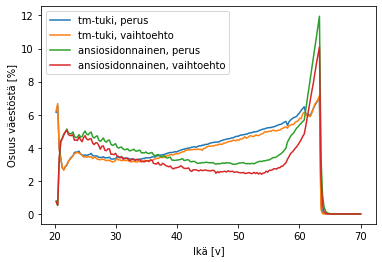

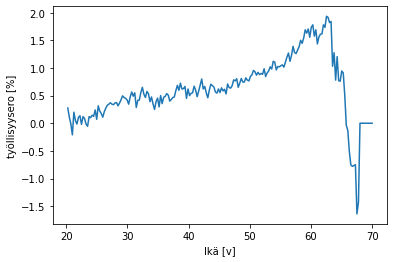

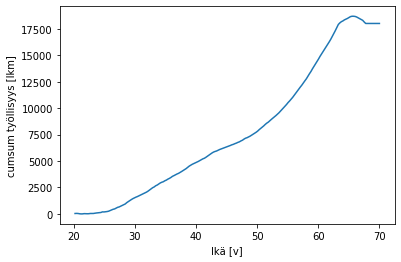

Kumulatiivinen työllisyysvaikutus 50 vuotiaana 7830.0 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 18065.2 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 17618.8 htv


In [10]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_eiputki/distrib_porras_v',n=13,startn=0,stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

Vaikutus työllisyysasteeseen -9452.5 htv


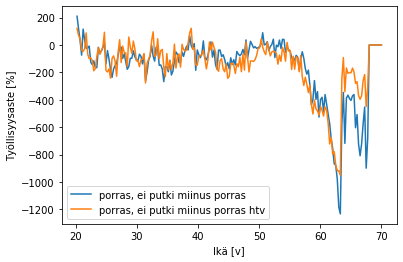

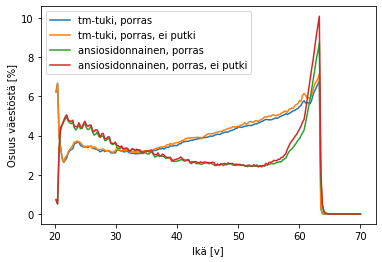

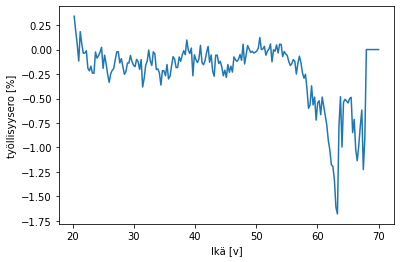

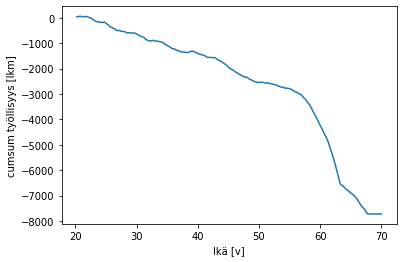

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -2547.8 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -6595.4 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -6294.8 htv


In [11]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_eiputki/distrib_porras_stats',label1='porras',label2='porras, ei putki')

# Porrasta vain 1 askel

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 1
Vaikutus työllisyyteen keskiarvo 2074822 htv, mediaani 2071108 htv std 7907 htv
   keskiarvo 2248378 työllistä, mediaani 2246624 työllistä, std 7766 työllistä


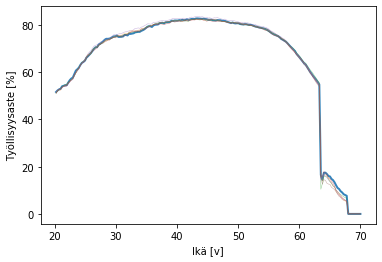

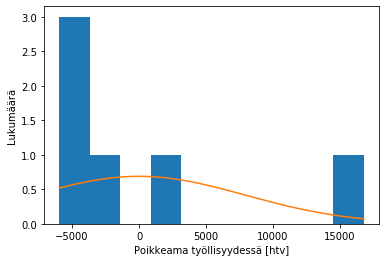

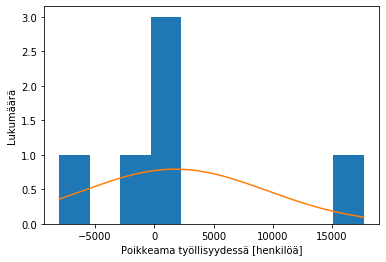

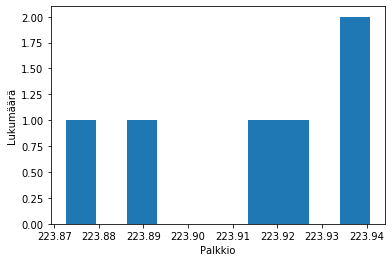

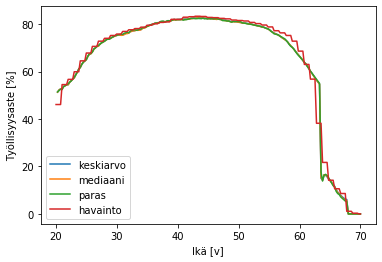

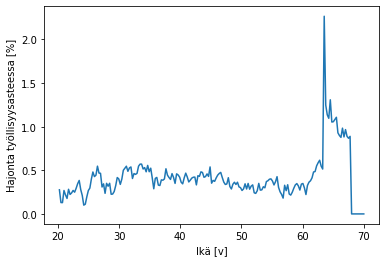

Vaikutus työllisyysasteeseen -16007.0 htv


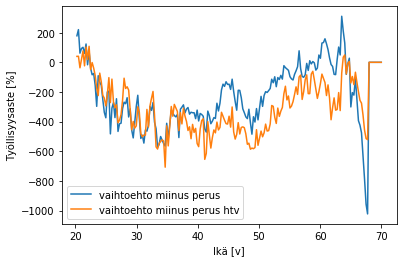

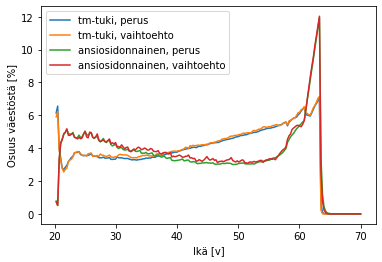

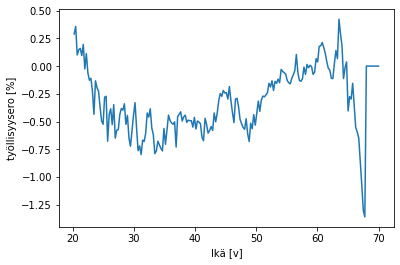

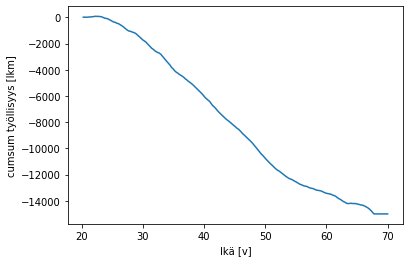

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -10816.6 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -14215.9 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -14116.3 htv


In [12]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_1askel/distrib_porras_v',n=6,startn=0,stats_results='results/porrastus_1askel/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_1askel/distrib_porras_stats')

Vaikutus työllisyysasteeseen -40218.5 htv


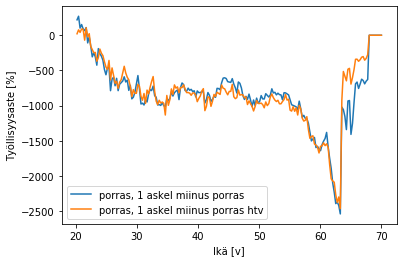

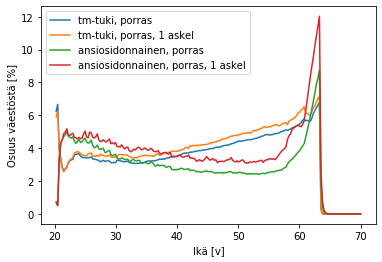

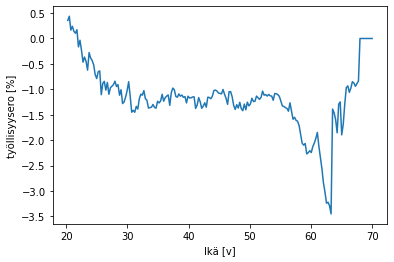

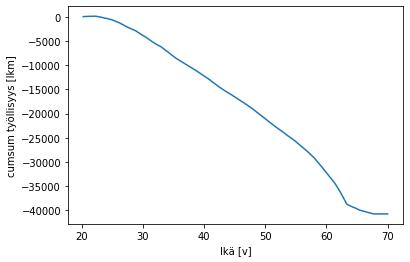

Kumulatiivinen työllisyysvaikutus 50 vuotiaana -21194.4 htv
Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -38876.5 htv
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -38029.9 htv


In [13]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_1askel/distrib_porras_stats',label1='porras',label2='porras, 1 askel')

In [21]:
2086215-1.96*6345/10

2084971.38

In [22]:
2086215+1.96*6345/10

2087458.62

In [23]:
0.75*100

75.0